In [1]:
import os
os.environ["LOGURU_LEVEL"] = "INFO"

from ect.tracking import Tracker, NaiveMatcher, FFTTransformer, FECTTransformer, FECTCorrTransformer
from ect.helpers import SequenceImageGenerator, IdSequenceImageGenerator
from ect import Config

import numpy as np
from matplotlib import pyplot as plt

In [2]:
generator = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 14)
tracker = Tracker(generator, NaiveMatcher(), FFTTransformer())

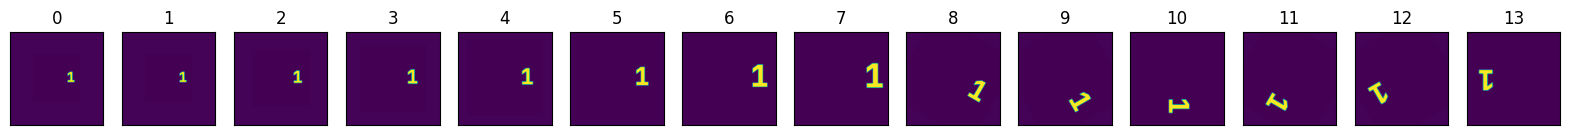

In [3]:

plt.figure(figsize=(20,5))

for idx, image in enumerate(generator.images()):
    # print(idx)
    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

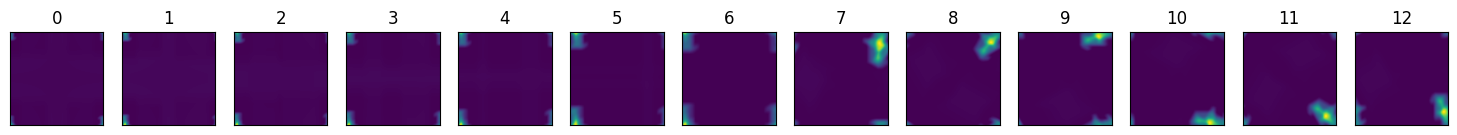

In [4]:
plt.figure(figsize=(20,5))

for idx, image in enumerate(tracker.track()):
    # print(idx)
    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(np.abs(np.fft.ifft2(image)))
    plt.xticks([])
    plt.yticks([])

In [5]:
generator = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 14)
transform = FECTTransformer(Config(), (314, 100))
tracker = Tracker(generator, NaiveMatcher(), transform)

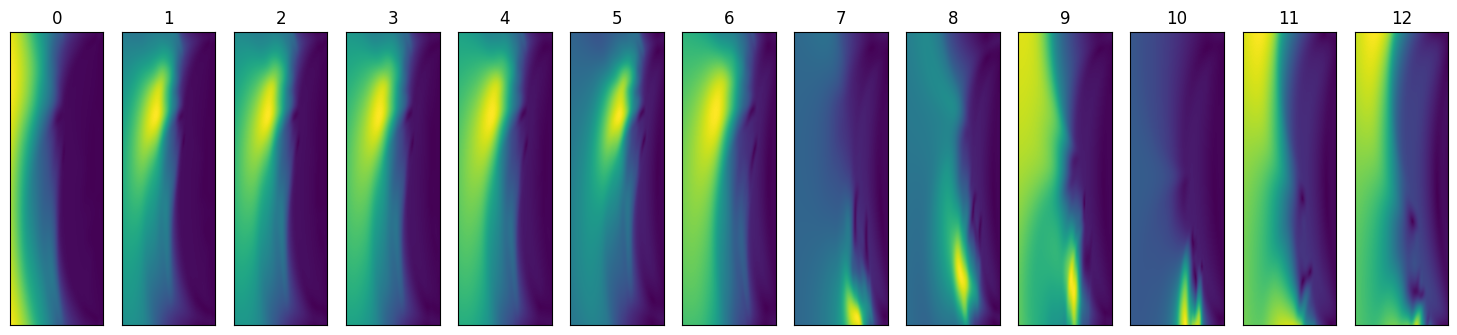

In [6]:
from ect import ifect

plt.figure(figsize=(20,5))

for idx, image in enumerate(tracker.track()):
    # print(idx)

    res = ifect(image, Config())

    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(np.abs(res))
    plt.xticks([])
    plt.yticks([])

In [7]:
generator = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 14)
transform = FECTCorrTransformer(Config(), (314, 100))
tracker = Tracker(generator, NaiveMatcher(), transform)

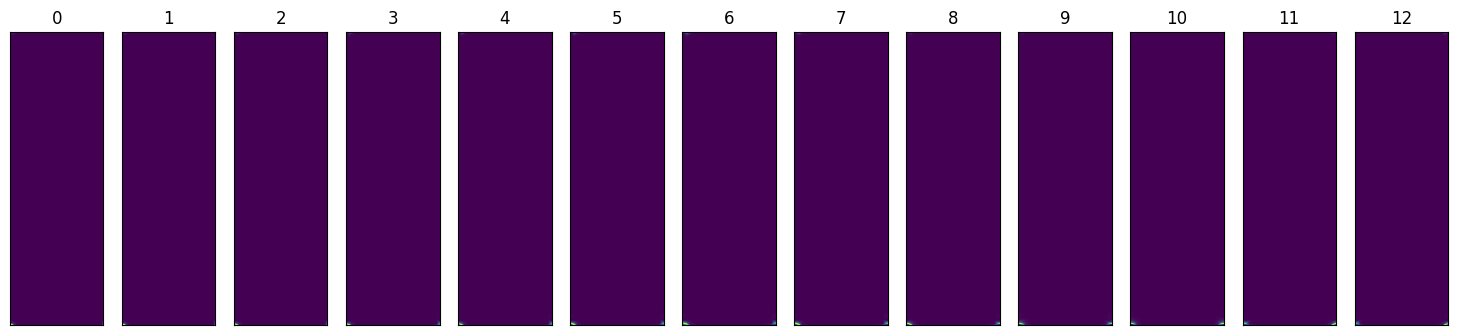

In [8]:
plt.figure(figsize=(20,5))

for idx, image in enumerate(tracker.track()):
    # print(idx)

    res = np.fft.ifft2(image)
    res = ifect(res, Config())

    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(np.abs(image))
    plt.xticks([])
    plt.yticks([])